# Assignment 3 : Group 6 
## Team Members
* Vuyo Fortune Mathe
* Roan Palm
* Henko Meyer

###  Build a multiple linear regression model with dataset *50_Startups*
---



# Import Libraries

In [30]:
import pandas as pd 
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


# Load Dataset 

In [14]:
# df is our dataset name 
df = pd.read_csv("50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [15]:
# Get the column names
column_names = df.columns.tolist()
column_names.remove('Profit')

# Print the column names
print(column_names)

['R&D Spend', 'Administration', 'Marketing Spend', 'State']


# Handle Categorical Features

In [16]:
# Initialize the encoder
encoder = ce.OrdinalEncoder(cols=column_names)

# Fit and transform the DataFrame
df_encoded = encoder.fit_transform(df)

# Print the encoded DataFrame
print(df_encoded)

    R&D Spend  Administration  Marketing Spend  State     Profit
0           1               1                1      1  192261.83
1           2               2                2      2  191792.06
2           3               3                3      3  191050.39
3           4               4                4      1  182901.99
4           5               5                5      3  166187.94
5           6               6                6      1  156991.12
6           7               7                7      2  156122.51
7           8               8                8      3  155752.60
8           9               9                9      1  152211.77
9          10              10               10      2  149759.96
10         11              11               11      3  146121.95
11         12              12               12      2  144259.40
12         13              13               13      3  141585.52
13         14              14               14      2  134307.35
14         15            

# Correlation of features against the label 

In [17]:
# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Get the correlation of features against the label
correlation_with_label = correlation_matrix['Profit']

# Print the correlation of features against the label
print(correlation_with_label)

R&D Spend         -0.971266
Administration    -0.973629
Marketing Spend   -0.872536
State              0.048471
Profit             1.000000
Name: Profit, dtype: float64


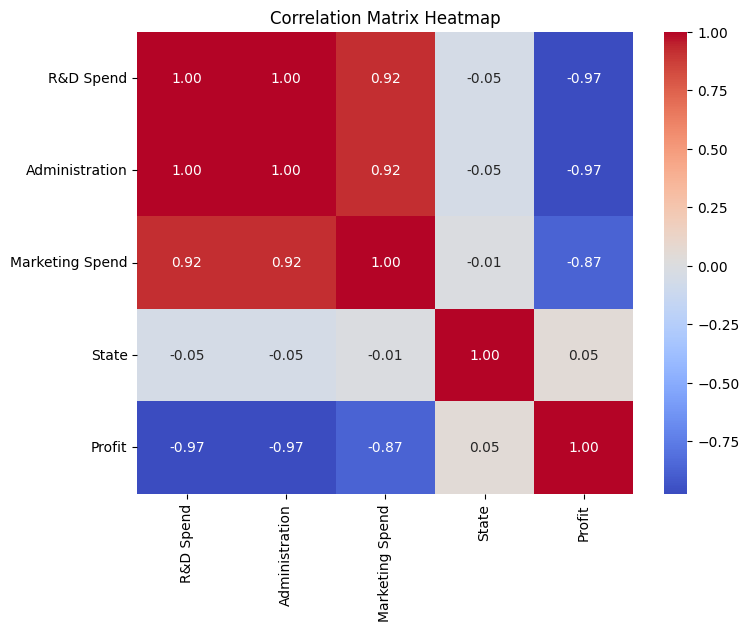

In [18]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Seperating Features and Labels

In [19]:
# Separate features and labels
X = df_encoded.drop('Profit', axis=1)  # Features (input data)
y = df_encoded['Profit']  # Labels (output/target)

# Print the separated features and labels
print("Features:")
print(X)
print("\nProfit:")
print(y)

Features:
    R&D Spend  Administration  Marketing Spend  State
0           1               1                1      1
1           2               2                2      2
2           3               3                3      3
3           4               4                4      1
4           5               5                5      3
5           6               6                6      1
6           7               7                7      2
7           8               8                8      3
8           9               9                9      1
9          10              10               10      2
10         11              11               11      3
11         12              12               12      2
12         13              13               13      3
13         14              14               14      2
14         15              15               15      3
15         16              16               16      1
16         17              17               17      2
17         18     

# Splitting Data

In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set - Features:", X_train.shape)
print("Training set - Labels:", y_train.shape)
print("Testing set - Features:", X_test.shape)
print("Testing set - Labels:", y_test.shape)

Training set - Features: (40, 4)
Training set - Labels: (40,)
Testing set - Features: (10, 4)
Testing set - Labels: (10,)


# Training the Model

In [25]:
# # Create an instance of the LinearRegression model
# model = LinearRegression()

# # Train the model on the training set
# model.fit(X_train, y_train)

# # Print the coefficients and intercept of the model
# print("Coefficients:", model.coef_)
# print("Intercept:", model.intercept_)

# Create an instance of the ElasticNet model
model = ElasticNet(alpha=0.5, l1_ratio=0.5)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-Squared:", r2)



Mean Squared Error: 33133475.26078553
R-Squared: 0.9590839718774534


c:\Users\roanh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.769e+09, tolerance: 6.886e+06
  model = cd_fast.enet_coordinate_descent(


# Predicting the profit of the test set 

In [26]:
# Predict the test set
y_pred = model.predict(X_test)

# Print the predicted values
print("Predicted values:", y_pred)

Predicted values: [143457.3762865   73990.59464473  97410.84804372  58585.73912748
 133396.11935709  39626.91482104 108098.04521938 111395.78475953
  92693.18970213 128052.52076926]


In [27]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 33133475.26078553
R-squared: 0.9590839718774534


In [29]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate the percentage of variance explained
variance_explained = r2 * 100

# Print the percentage of variance explained
print("Percentage of Accuracy:", variance_explained)

Percentage of Accuracy: 95.90839718774534


# Evaluate Model 

Mean Absolute Error: 5337.778969473268


# Results Interpretation